In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression

fires = pd.read_csv('fires.csv')
fires.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


In [2]:
model = LinearRegression()
fires.isna().sum()

#We see that there are many missing values in the data, so we will have to fill in the missing datapoints later

Unnamed: 0     0
X              0
Y              0
month          0
day            0
FFMC          48
DMC           21
DC            43
ISI            2
temp          21
RH            30
wind          35
rain          32
area           0
dtype: int64

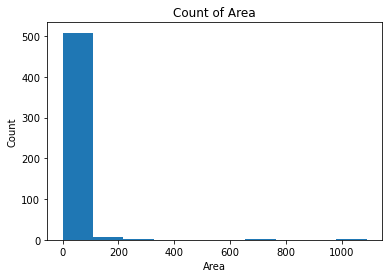

In [3]:
y = fires['area']

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y)
plt.title('Count of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

#We want to limit the "extremness" of some of our values since there are huge outliers, so we'll take the log of our y

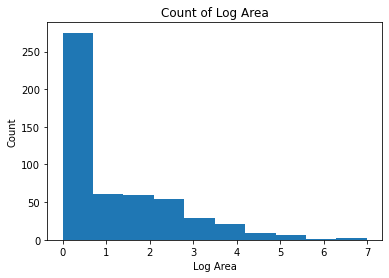

In [4]:
y_log = np.log(y + 1)
plt.hist(y_log)
plt.title('Count of Log Area')
plt.xlabel('Log Area')
plt.ylabel('Count')
plt.show()

#It's easy to see that the distribution of area's are not much more 'normal' than before 

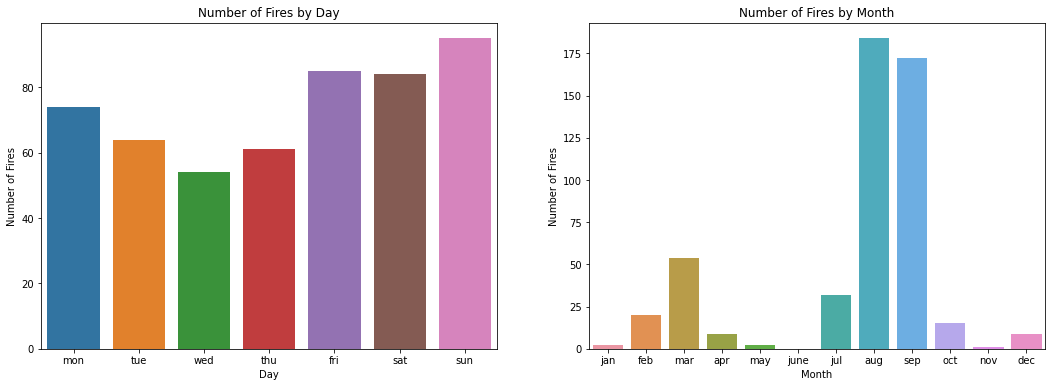

In [5]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize = (18,6))
sns.countplot(data = fires, x = 'month', order = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.ylabel('Number of Fires')
plt.xlabel('Month')
plt.title('Number of Fires by Month')
sns.countplot(ax = axs[0], data = fires, x = 'day', order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
axs[0].set_ylabel('Number of Fires')
axs[0].set_xlabel('Day')
axs[0].set_title('Number of Fires by Day')
plt.show()

#These columns clearly provide some predictive value, since the number of fires varies substantially within each category
#We'll now use one-hot encoding to make them into numerical columns to be used in sklearn

In [6]:
week_dummies = pd.get_dummies(fires['day'])
fires.drop('day', axis = 1, inplace = True)
fires = pd.concat([fires, week_dummies], axis = 1)
fires.head()

,Unnamed: 0,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fri,mon,sat,sun,thu,tue,wed
0,1,7,5,mar,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0,1,0,0,0,0,0,0
1,2,7,4,oct,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0,0,0,0,0,0,1,0
2,3,7,4,oct,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0,0,0,1,0,0,0,0
3,4,8,6,mar,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0,1,0,0,0,0,0,0
4,5,8,6,mar,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0,0,0,0,1,0,0,0


In [7]:
def summer(x):
    if x in ['jun', 'jul', 'aug']:
        return 1
    else:
        return 0
    
fires['month'] = fires['month'].apply(summer)
fires.head()

fires['month'].value_counts()

0    284
1    233
Name: month, dtype: int64

In [8]:
fires.rename({'month': 'summer?'}, inplace = True, axis = 1)

In [9]:
X = fires.drop(['Unnamed: 0', 'area', "X", "Y"], axis = 1)

from sklearn.impute import KNNImputer
imp = KNNImputer(missing_values= np.nan, n_neighbors=3)
X.iloc[:, 1:9] = imp.fit_transform(X.iloc[:, 1:9])

X.isna().sum()
X.head()

#Here we used a KNN imputer to fill in the missing values in our feature columns

,summer?,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fri,mon,sat,sun,thu,tue,wed
0,0,86.2,26.200000,94.300000,5.1,16.6,51.0,6.700000,0.0,1,0,0,0,0,0,0
1,0,90.6,56.433333,669.100000,6.7,18.0,33.0,0.900000,0.0,0,0,0,0,0,1,0
2,0,90.6,43.700000,470.833333,6.7,14.6,33.0,1.300000,0.0,0,0,1,0,0,0,0
3,0,91.7,33.300000,77.500000,9.0,8.3,97.0,4.000000,0.2,1,0,0,0,0,0,0
4,0,89.3,51.300000,102.200000,9.6,11.4,99.0,4.333333,0.0,0,0,0,1,0,0,0


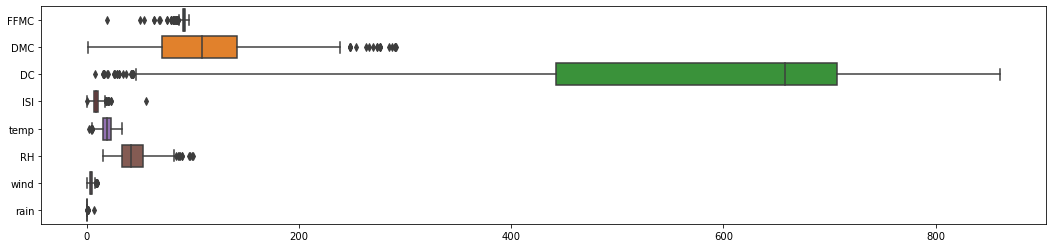

In [10]:
plt.figure(figsize = (18, 4))
sns.boxplot(data= X.iloc[:, 1:9], orient="h")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
need_scaling = X.iloc[:, 1:9]
X.iloc[:, 1:9] = scaler.fit_transform(need_scaling)
X.head()

#Now we've scaled our data to have more accurate predictions and mitigate the effect of outliers

,summer?,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fri,mon,sat,sun,thu,tue,wed
0,0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268,1,0,0,0,0,0,0
1,0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268,0,0,0,0,0,1,0
2,0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268,0,0,1,0,0,0,0
3,0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155,1,0,0,0,0,0,0
4,0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268,0,0,0,1,0,0,0


In [12]:
new_fires = pd.concat([X, y_log], axis = 1)
new_fires.head()

,summer?,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fri,mon,sat,sun,thu,tue,wed,area
0,0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268,1,0,0,0,0,0,0,0.0
1,0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268,0,0,0,0,0,1,0,0.0
2,0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268,0,0,1,0,0,0,0,0.0
3,0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155,1,0,0,0,0,0,0,0.0
4,0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268,0,0,0,1,0,0,0,0.0


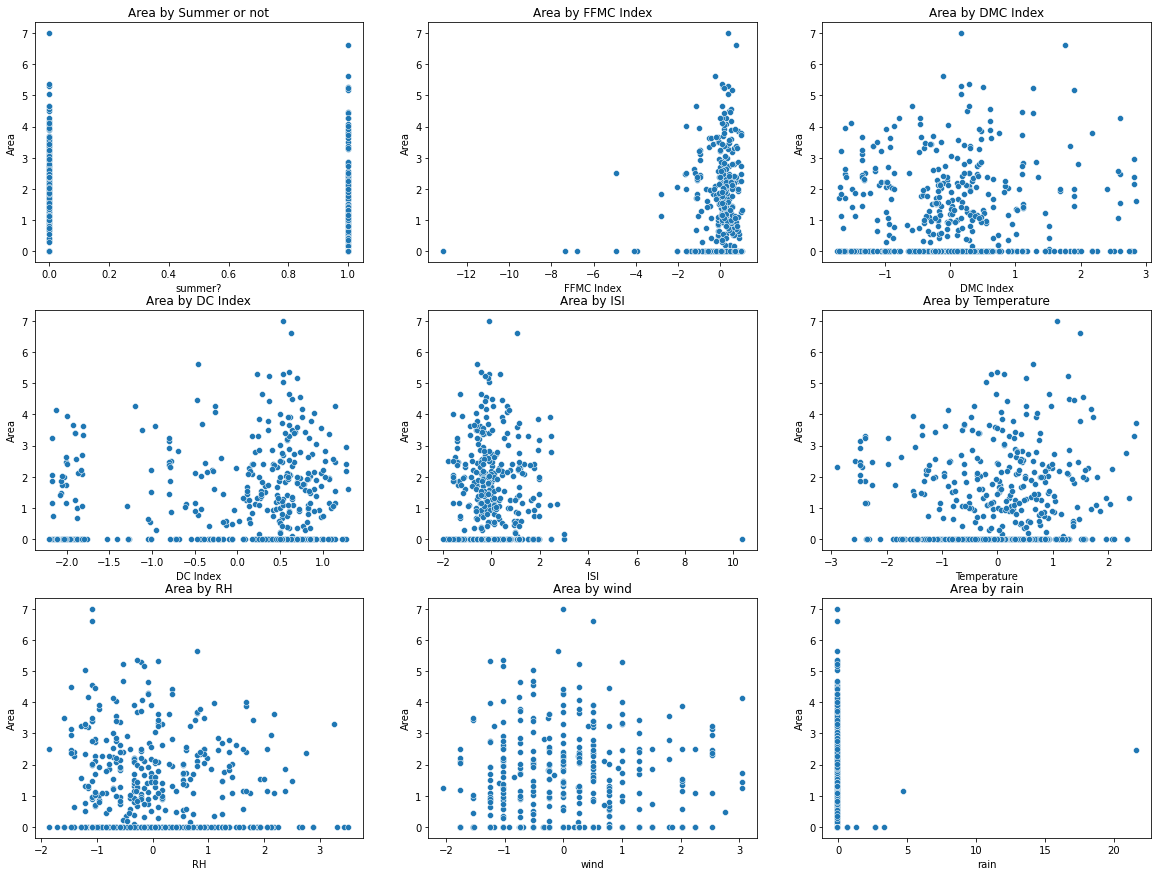

In [13]:
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize = (20, 15))

sns.scatterplot(ax = axs[0, 0], data = new_fires, x = 'summer?', y = 'area')
axs[0, 0].set_ylabel('Area')
axs[0, 0].set_title('Area by Summer or not')

sns.scatterplot(ax = axs[0, 1], data = new_fires, x = 'FFMC', y = 'area')
axs[0, 1].set_ylabel('Area')
axs[0, 1].set_xlabel('FFMC Index')
axs[0, 1].set_title('Area by FFMC Index')

sns.scatterplot(ax = axs[0, 2], data = new_fires, x = 'DMC', y = 'area')
axs[0, 2].set_ylabel('Area')
axs[0, 2].set_xlabel('DMC Index')
axs[0, 2].set_title('Area by DMC Index')

sns.scatterplot(ax = axs[1, 0], data = new_fires, x = 'DC', y = 'area')
axs[1, 0].set_ylabel('Area')
axs[1, 0].set_xlabel('DC Index')
axs[1, 0].set_title('Area by DC Index')

sns.scatterplot(ax = axs[1, 1], data = new_fires, x = 'ISI', y = 'area')
axs[1, 1].set_ylabel('Area')
axs[1, 1].set_title('Area by ISI')

sns.scatterplot(ax = axs[1, 2], data = new_fires, x = 'temp', y = 'area')
axs[1, 2].set_ylabel('Area')
axs[1, 2].set_xlabel('Temperature')
axs[1, 2].set_title('Area by Temperature')

sns.scatterplot(ax = axs[2, 0], data = new_fires, x = 'RH', y = 'area')
axs[2, 0].set_ylabel('Area')
axs[2, 0].set_xlabel('RH')
axs[2, 0].set_title('Area by RH')

sns.scatterplot(ax = axs[2, 1], data = new_fires, x = 'wind', y = 'area')
axs[2, 1].set_ylabel('Area')
axs[2, 1].set_xlabel('wind')
axs[2, 1].set_title('Area by wind')

sns.scatterplot(ax = axs[2, 2], data = new_fires, x = 'rain', y = 'area')
axs[2, 2].set_ylabel('Area')
axs[2, 2].set_title('Area by rain')


plt.show()

In [14]:
X = X.drop(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], axis = 1)

We'll now choose which features are most significant using both forward and backward sequential feature selection.

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector


model1 = LinearRegression()

forward_2 = SequentialFeatureSelector(estimator=model1,
                                       n_features_to_select=2, 
                                       direction="forward")
forward_2.fit(X, y_log)
forward2_features = forward_2.get_feature_names_out()
print(forward2_features)

forward_4 = SequentialFeatureSelector(estimator=model1,
                                       n_features_to_select=4, 
                                       direction="forward")
forward_4.fit(X, y_log)
forward4_features = forward_4.get_feature_names_out()
print(forward4_features)

forward_6 = SequentialFeatureSelector(estimator=model1,
                                       n_features_to_select=6, 
                                       direction="forward")
forward_6.fit(X, y_log)
forward6_features = forward_6.get_feature_names_out()
print(forward6_features)

['FFMC' 'DC']
['FFMC' 'DC' 'RH' 'wind']
['summer?' 'FFMC' 'DC' 'ISI' 'RH' 'wind']


In [16]:
backward_2 = SequentialFeatureSelector(estimator=model1,
                                       n_features_to_select=2, 
                                       direction="backward")
backward_2.fit(X, y_log)
backward2_features = backward_2.get_feature_names_out()
print(backward2_features)

backward_4 = SequentialFeatureSelector(estimator=model1,
                                       n_features_to_select=4, 
                                       direction="backward")
backward_4.fit(X, y_log)
backward4_features = backward_4.get_feature_names_out()
print(backward4_features)

backward_6 = SequentialFeatureSelector(estimator=model1,
                                       n_features_to_select=6, 
                                       direction="backward")
backward_6.fit(X, y_log)
backward6_features = backward_6.get_feature_names_out()
print(backward6_features)

['DC' 'wind']
['FFMC' 'DC' 'RH' 'wind']
['summer?' 'FFMC' 'DC' 'ISI' 'RH' 'wind']


In [17]:
X.head()

,summer?,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268
1,0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268
2,0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268
3,0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155
4,0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268


It seems like the top 4 most important features for our model are FFMC, DC, RH, and wind, but we'll test the effectivness of all 2, 4, 6 combinations to see which gets the best outcome.

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = .3, random_state = 86)

model2.fit(X_train[forward2_features], y_train)
model2_pred = model2.predict(X_test[forward2_features])

print("The mean squared error of model 2 with the two forward features is: {}".format(mean_squared_error(model2_pred, y_test)))

model3.fit(X_train[backward2_features], y_train)
model3_pred = model3.predict(X_test[backward2_features])

print("The mean squared error of model 3 with the two backward features is: {}".format(mean_squared_error(model3_pred, y_test)))

model4.fit(X_train[forward4_features], y_train)
model4_pred = model4.predict(X_test[forward4_features])

print("The mean squared error of model 4 with the four forward features is: {}".format(mean_squared_error(model4_pred, y_test)))

model5.fit(X_train[forward6_features], y_train)
model5_pred = model5.predict(X_test[forward6_features])

print("The mean squared error of model 4 with the six forward features is: {}".format(mean_squared_error(model5_pred, y_test)))

The mean squared error of model 2 with the two forward features is: 1.7945453081278135
The mean squared error of model 3 with the two backward features is: 1.7784484993098415
The mean squared error of model 4 with the four forward features is: 1.7708075479835999
The mean squared error of model 4 with the six forward features is: 1.798643341685809


We see that our highest performing model was the one trained on the four features that were shared between the backwards and forewards selectors that we set to select four features.

In [19]:
best_features = X[forward4_features]

from sklearn.linear_model import RidgeCV, LassoCV
model6 = RidgeCV(alphas = np.linspace(1, 10000, num = 1000))
model6.fit(best_features, y_log)
print('The best Ridge alpha is {}'.format(model6.alpha_))
print('The Ridge model coefficients are {}'.format(model6.coef_))

model7 = LassoCV(alphas = np.linspace(1, 10000, num = 1000))
model7.fit(best_features, y_log)
print('The best Lasso alpha is {}'.format(model7.alpha_))
print('The Lasso model coefficients are {}'.format(model7.coef_))

The best Ridge alpha is 491.44144144144144
The Ridge model coefficients are [ 0.02119129  0.0467643  -0.02838445  0.05037291]
The best Lasso alpha is 10000.0
The Lasso model coefficients are [ 0.  0. -0.  0.]


We're not going to use the Lasso model since it is encouraging us to use 0 features in our model.

In [85]:
from sklearn.model_selection import cross_val_score

model2_score = cross_val_score(model2, X[forward2_features], y_log, cv = 5, scoring = 'neg_mean_squared_error')
print('The mean cross validation score of model2 is {}'.format(np.mean(model2_score)))
print('The standard deviation of our cross validation scores for model2 is {}'.format(np.std(model2_score)))
print('\n')

model3_score = cross_val_score(model3, X[backward2_features], y_log, cv = 5, scoring = 'neg_mean_squared_error')
print('The mean cross validation score of model3 is {}'.format(np.mean(model3_score)))
print('The standard deviation of our cross validation scores for model3 is {}'.format(np.std(model3_score)))
print('\n')

model4_score = cross_val_score(model2, X[forward4_features], y_log, cv = 5, scoring = 'neg_mean_squared_error')
print('The mean cross validation score of model4 is {}'.format(np.mean(model4_score)))
print('The standard deviation of our cross validation scores for model4 is {}'.format(np.std(model4_score)))
print('\n')

model5_score = cross_val_score(model2, X[forward6_features], y_log, cv = 5, scoring = 'neg_mean_squared_error')
print('The mean cross validation score of model5 is {}'.format(np.mean(model5_score)))
print('The standard deviation of our cross validation scores for model5 is {}'.format(np.std(model5_score)))
print('\n')

model6_score = cross_val_score(model6, best_features, y_log, cv = 5, scoring = 'neg_mean_squared_error')
print('The mean cross validation score of model5 is {}'.format(np.mean(model6_score)))
print('The standard deviation of our cross validation scores for model5 is {}'.format(np.std(model6_score)))

The mean cross validation score of model2 is -2.1735431721198535
The standard deviation of our cross validation scores for model2 is 1.0208083278697586


The mean cross validation score of model3 is -2.173357302739327
The standard deviation of our cross validation scores for model3 is 1.0038109503795958


The mean cross validation score of model4 is -2.193528106772711
The standard deviation of our cross validation scores for model4 is 1.0004774710977682


The mean cross validation score of model5 is -2.239722553934875
The standard deviation of our cross validation scores for model5 is 1.0123323877770343


The mean cross validation score of model5 is -2.1813647978140542
The standard deviation of our cross validation scores for model5 is 1.0124859412881984


Remember that although these mean cross validation MSEs may look good, we took the log of the 'area' column so our MSEs are between 100-1000 on a normal scale. We'll now try to use a Spline to improve our mean MSEs.

In [102]:
from sklearn.preprocessing import SplineTransformer

test_mses = []
for i in range(2, 11):
    spline = SplineTransformer(degree = 3, n_knots = i, knots = 'uniform')
    model = LinearRegression()
    X_spline = spline.fit_transform(X[backward2_features])
    spline_score = np.mean(cross_val_score(model, X_spline, y_log, cv = 5, scoring = 'neg_mean_squared_error'))
    test_mses.append(spline_score)
optimal_knots = test_mses.index(max(test_mses))+2

print('The list of MSEs for our spline model with 2-11 knots is: {}.'.format(test_mses))
print('The optimal number of knots is {}.'.format(optimal_knots))

The list of MSEs for our spline model with 2-11 knots is: [-2.266692946673953, -2.306739346382087, -2.3027098089581335, -2.321817494293202, -2.416737872230041, -2.452013630943008, -2.4521646918598123, -2.6255194374842548, -2.7955378580324117].
The optimal number of knots is 2.


It seems like a spline model with degree three and 2 knots does not out-perform our linear models when evaluated using cross validation after being trained on the optimal set of features. Our top performing model by negative MSE when evaluated using 5-fold cross validation was trained on the 2 'backward' features.

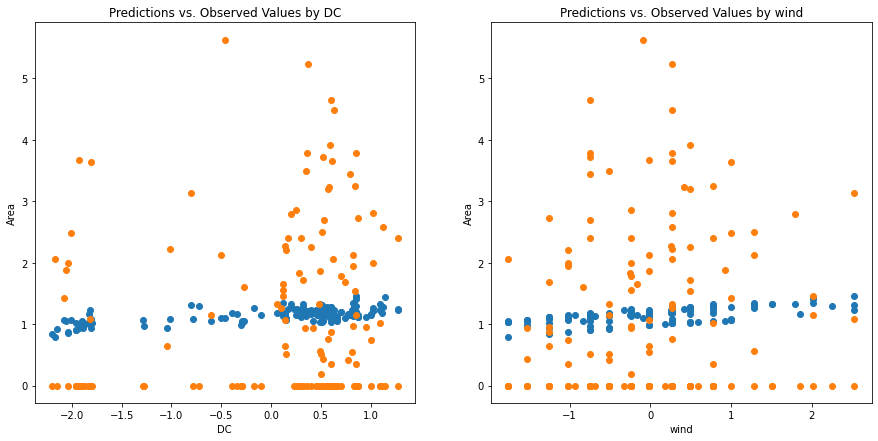

In [96]:
final_model = LinearRegression()
final_train_features = X_train[backward2_features]
final_test_features = X_test[backward2_features]
final_model.fit(final_train_features, y_train)
final_predictions = pd.DataFrame(final_model.predict(final_test_features))

fig, axs = plt.subplots(1, 2, figsize = (15, 7))

axs[0].set_title('Predictions vs. Observed Values by DC')
axs[0].scatter(final_test_features['DC'], final_predictions)
axs[0].scatter(final_test_features['DC'], y_test)
axs[0].set_xlabel('DC')
axs[0].set_ylabel('Area')

axs[1].set_title('Predictions vs. Observed Values by wind')
axs[1].scatter(final_test_features['wind'], final_predictions)
axs[1].scatter(final_test_features['wind'], y_test)
axs[1].set_xlabel('wind')
axs[1].set_ylabel('Area')

plt.show()

We can see from the above plots that there is little relationship between even our best performing features and the area of the fires we are studying. This makes predicting the area of future fires quite difficult.